**Importing Libraries:** The code first imports the
necessary libraries for data manipulation and
visualization, including pandas, matplotlib, seaborn,
and missingno.

**Loading the Dataset:** The code loads the dataset
from the file "Flipkart_Mobiles.csv" into a pandas
DataFrame named 'df'.

In [1]:
# import pandas library for data manipulation and analysis

# import Matplotlib library for data visualization
!pip install missingno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# load the data
df = pd.read_csv(r"C:\Users\sv833\Documents\FlipKart Mobile sales Data Visualisation and Price Prediction\Flipkart_Mobiles.csv")

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Shape of data
df.shape

(3114, 8)

In [3]:
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


In [4]:
df.tail()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989
3113,SAMSUNG,M52 5G,Sky Blue,8 GB,128 GB,4.2,20350,22595


In [5]:
# datatypes of attributes
df.dtypes

Brand              object
Model              object
Color              object
Memory             object
Storage            object
Rating            float64
Selling Price       int64
Original Price      int64
dtype: object

In [6]:
df.describe()

,Rating,Selling Price,Original Price
count,2970.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025
std,0.271991,30066.892622,31525.599889
min,2.300000,1000.000000,1000.000000
25%,4.100000,9990.000000,10030.250000
50%,4.300000,15000.000000,16889.500000
75%,4.400000,28999.000000,31500.000000
max,5.000000,179900.000000,189999.000000


In [7]:
# inforamtion about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   object 
 4   Storage         3075 non-null   object 
 5   Rating          2970 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 194.8+ KB


In [8]:
# no of unique values in each attribut
df.nunique()

Brand              17
Model             914
Color             639
Memory             26
Storage            26
Rating             25
Selling Price     844
Original Price    819
dtype: int64

In [9]:
#Distribution of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,2970.0,4.243098,0.271991,2.3,4.10,4.3,4.4,5.0
Selling Price,3114.0,26436.625562,30066.892622,1000.0,9990.00,15000.0,28999.0,179900.0
Original Price,3114.0,28333.473025,31525.599889,1000.0,10030.25,16889.5,31500.0,189999.0


In [10]:
# checking for null values or missing data
df[df.isnull().any(axis=1)].head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
37,OPPO,A16,Pearl Blue,4 GB,64 GB,NaN,13850,13850
41,OPPO,A16,CRYSTAL BLACK,4 GB,64 GB,NaN,13990,15990
128,OPPO,A16,Crystal Black,4 GB,64 GB,NaN,13490,13490
145,OPPO,F19s,Glowing Gold,6 GB,128 GB,NaN,19990,22990
146,OPPO,F19s,Glowing Black,6 GB,128 GB,NaN,19990,22990


In [11]:
# attribute wise sum of missing entries
df.isnull().sum()

Brand               0
Model               0
Color               0
Memory             43
Storage            39
Rating            144
Selling Price       0
Original Price      0
dtype: int64

In [12]:
# count of duplicate entries
df.duplicated().sum()

108

# Data Cleaning and Manipulation

## Removing Duplicates

**Removing Duplicates:**
It removes duplicate rows from the
DataFrame using the
drop_duplicates() method

In [13]:
# removing duplicate rows
df.drop_duplicates(inplace=True)
print(df.duplicated().sum)
df.isnull().sum()

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
3109    False
3110    False
3111    False
3112    False
3113    False
Length: 3006, dtype: bool>


Brand               0
Model               0
Color               0
Memory             40
Storage            39
Rating            130
Selling Price       0
Original Price      0
dtype: int64

## Dealing with missing data

**msno.bar(df, figsize=(6, 3), color='blue')**
visualizes the missing values in the dataset
using a bar chart

<Axes: >

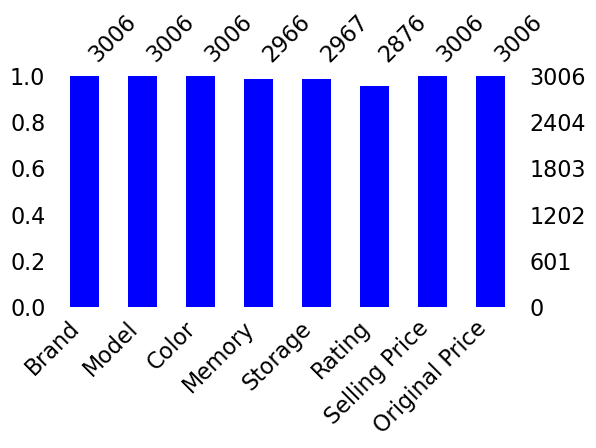

In [14]:
# Visualize missing numbers in the dataset
msno.bar(df,figsize=(6,3),color='blue')

convert categorical attributes
into numeric codes using **pandas'
astype('category') and cat.codes functions**

In [15]:
# assigning unique integer codes to each category in each attribute

df["Brand"] = df ["Brand"].astype('category')
df ["Brand"] = df ["Brand"].cat.codes
df ["Model"] = df ["Model"].astype('category')
df ["Model"] = df ["Model"].cat.codes
df ["Color"]= df ["Color"].astype('category')
df ["Color"] = df ["Color"].cat.codes
df ["Memory"] = df ["Memory"].astype('category')
df ["Memory"] = df ["Memory"].cat.codes
df ["Storage"] df ["Storage"].astype('category')
df["Storage"]= df ["Storage"].cat.codes

print(df)

SyntaxError: invalid syntax (2337894411.py, line 11)

**df.fillna(df.mean())**
fills the missing values with the
mean of the corresponding attribute

In [ ]:
# filling null values with mean of individual attributes
df.fillna(df.mean)

## Grouping Data

**df['Brand'].groupby(df['Brand']).count().sort_values
(ascending=False)**
shows the count of mobile phones grouped
by brand and sorted in descending order

In [16]:
df['Brand'].groupby(df['Brand']).count().sort_values(ascending=False)

Brand
SAMSUNG         704
Apple           324
realme          322
OPPO            257
Nokia           199
Xiaomi          198
Infinix         150
GIONEE          128
vivo            124
ASUS            117
Lenovo          117
Motorola        104
LG               99
POCO             74
HTC              55
Google Pixel     29
IQOO              5
Name: Brand, dtype: int64

**df['Brand'].groupby(df['Memory']).count().sort_values(ascending=False)**
shows the count of mobile phones grouped by
memory size and sorted in descending order.


In [17]:
df['Brand'].groupby(df['Memory']).count().sort_values(ascending=False)

Memory
4 GB      736
6 GB      492
3 GB      477
2 GB      365
8 GB      340
1 GB      191
4GB       113
12 GB      60
512 MB     46
4 MB       39
1.5 GB     29
16 MB      15
32 MB      14
64 MB      14
8 MB       10
768 MB      6
128 MB      4
10 MB       3
2 MB        2
18 GB       2
46 MB       2
16 GB       2
32 GB       1
153 MB      1
100 MB      1
30 MB       1
Name: Brand, dtype: int64

## DATA Analysis


In [18]:
sns.set_style("white")

**sns.pairplot(df, hue='Brand'):**
This creates a pair plot of the DataFrame df,
which shows scatter plots of all numerical attributes
against each other.
The hue='Brand' parameter colors the points in the pair
plot based on the different values in the "Brand"
attribute.This helps to distinguish data points belonging
to different brands

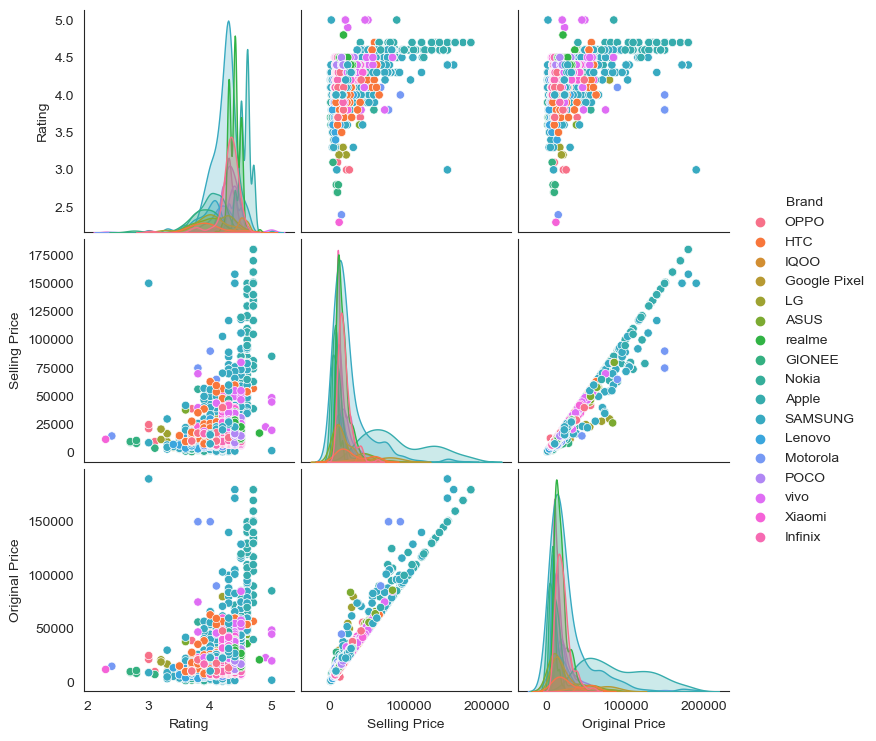

In [19]:
sns.pairplot(df,hue='Brand')

The below code creates a histogram of the "Selling Price" attribute using the
seaborn displot function.
The x='Selling Price' parameter specifies the attribute to be
plotted on the x-axis.
The bins parameter specifies the bins or intervals for the
histogram.
The aspect=1.2 parameter sets the aspect ratio of the plot to
make it wider.
The color='blue' parameter sets the color of the histogram bars
to blue.

In this specific code snippet, it is used to visualize the distribution of selling prices in the specified bins, giving an
overview of how the selling prices are distributed within the given intervals

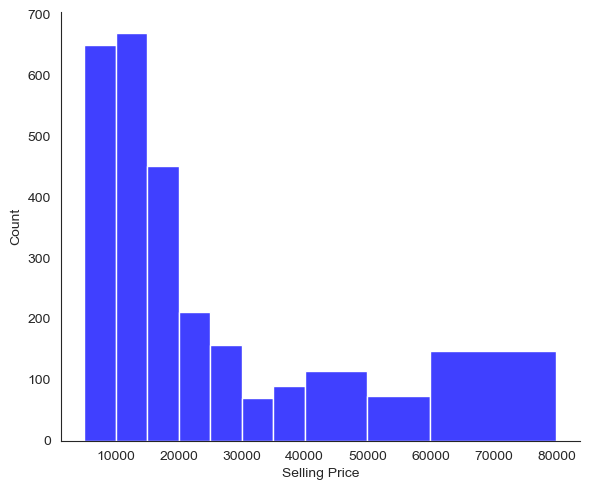

In [20]:
sns.displot(df, x = 'Selling Price', bins=[5000, 10000, 15000, 20000,25000, 30000, 35000, 40000, 50000, 60000, 80000], aspect=1.2,color='blue')

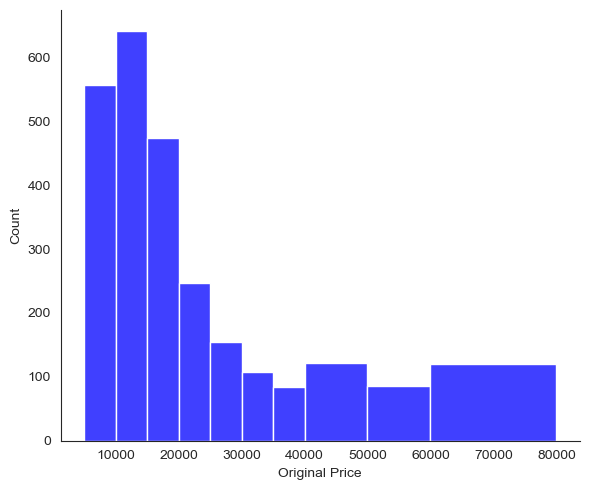

In [21]:
sns.displot(df, x = 'Original Price', bins=[5000, 10000, 15000, 20000,25000, 30000, 35000, 40000, 50000, 60000, 80000], aspect=1.2,color='blue')

This creates a histogram of the "Original Price" attribute
using the seaborn displot function.
It is similar to the previous histogram but visualizes
the distribution of original prices.


In this specific code snippet, it is used to visualize the
distribution of original prices in the specified bins,
giving an overview of how the originaal prices are
distributed within the given intervals

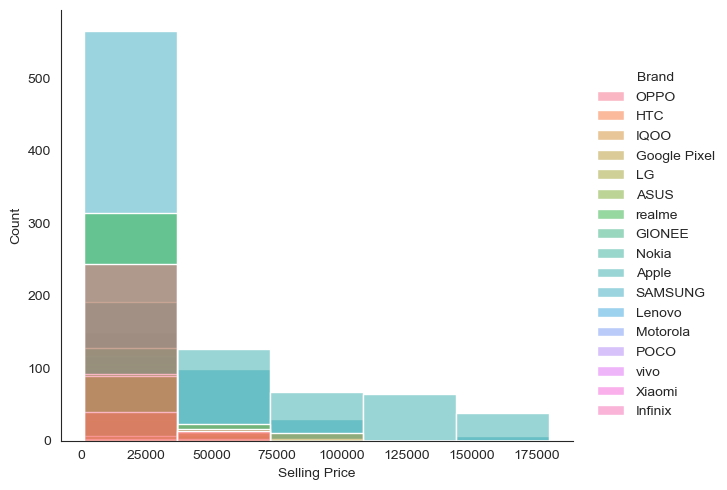

In [22]:
#brandwise mobile phone price segments
sns.displot(df, x='Selling Price',bins=5, hue='Brand', aspect=1.2)

This creates a histogram of the "Selling Price"
attribute using the seaborn displot function.
The bins=5 parameter specifies the number of bins
for the histogram.
The hue='Brand' parameter colors the bars in the
histogram based on the "Brand" attribute,
allowing us to see the price distribution
for each brand.

brandwise mobile phone price segments
This specific code snippet is useful for
understanding how the distribution of "Selling Price"
varies across different brands,
providing insights into the pricing patterns for
each brand in the dataset.

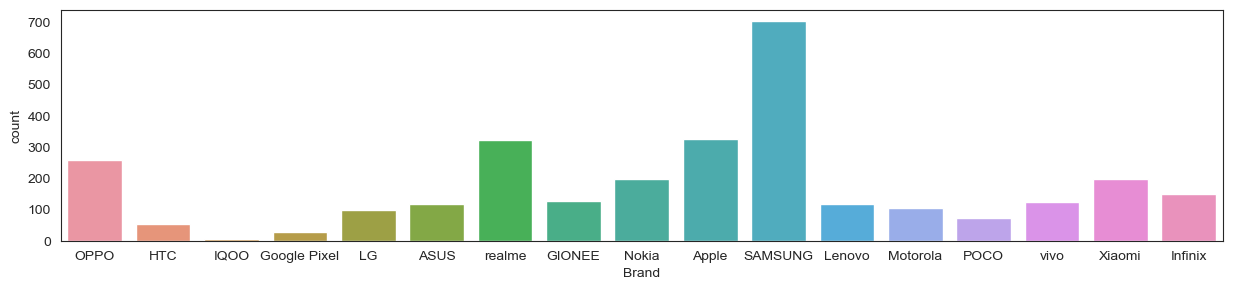

In [23]:
fig,ax = plt.subplots(figsize=(15,3))
ax=sns.countplot(x="Brand", data=df)

This creates a subplot with a
figure size of 15 (width) by
3 (height) inches.
This creates a count plot (bar plot)
of the "Brand" attribute, showing
the count of mobile phones for
each brand.

The plot helps to visualize
the distribution of brands
and the frequency of their
occurrence in the dataset,
giving insights into the
popularity or prevalence of
different brands in the dataset.


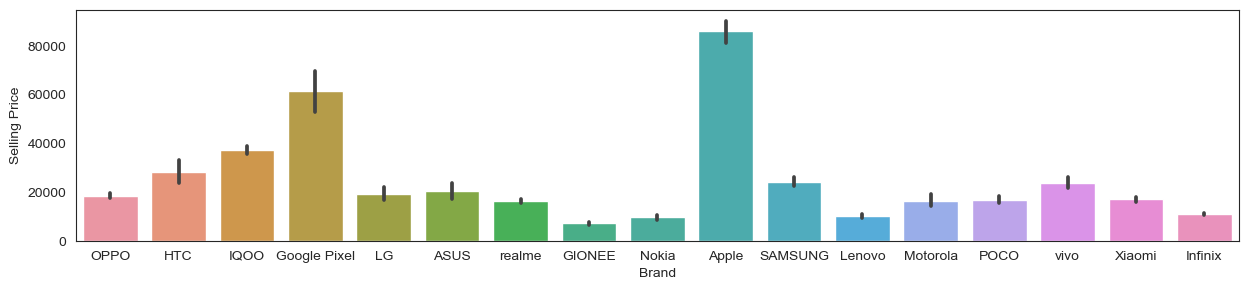

In [24]:
fig,ax = plt.subplots(figsize=(15,3))
ax=sns.barplot(y="Selling Price", x="Brand", data=df)

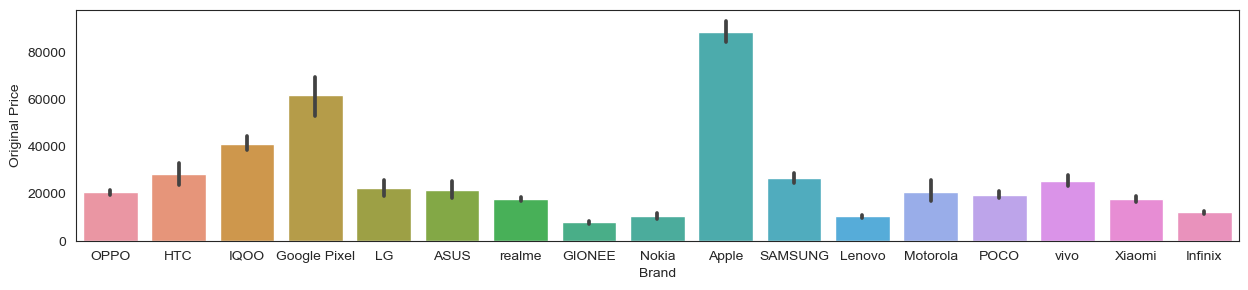

In [25]:
fig,ax = plt.subplots(figsize=(15,3))
ax=sns.barplot(y="Original Price", x="Brand", data=df)

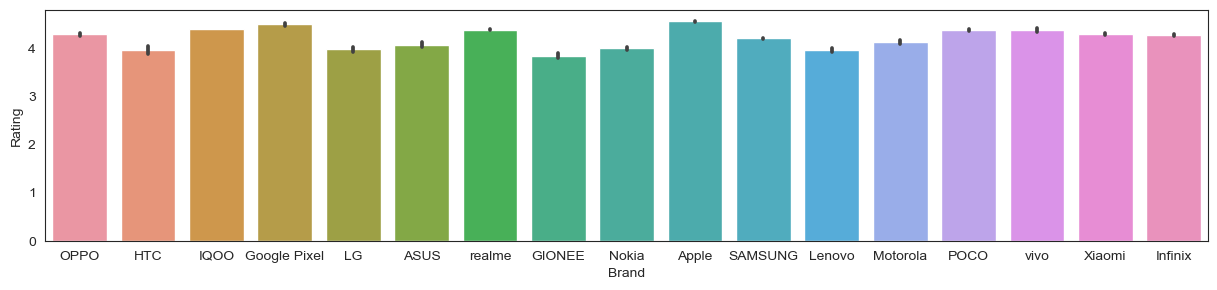

In [26]:
fig,ax = plt.subplots(figsize=(15,3))
ax=sns.barplot(y="Rating", x="Brand", data=df)

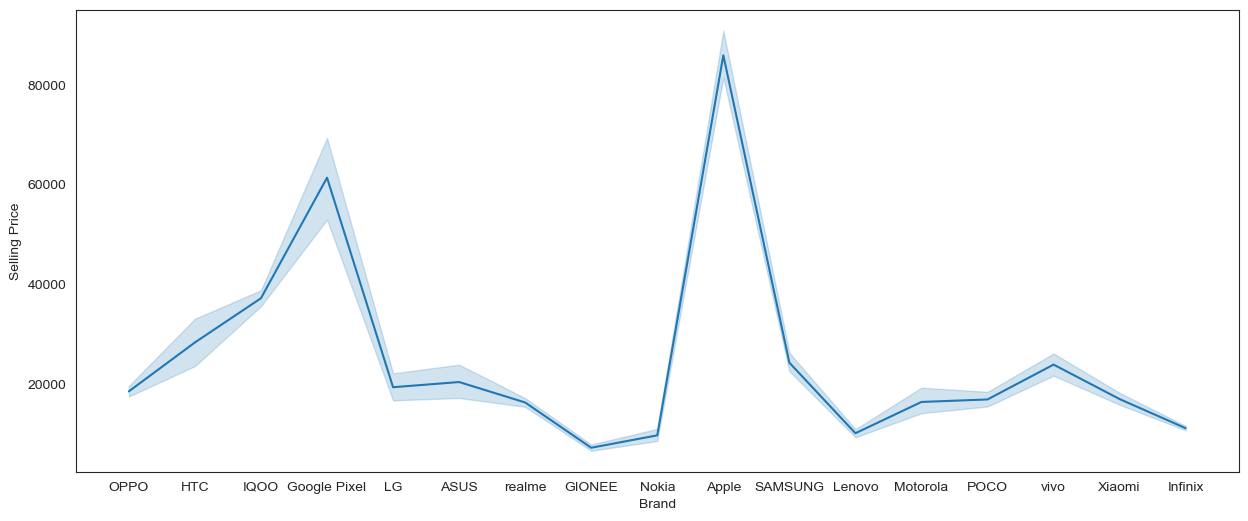

In [27]:
fig,ax = plt.subplots(figsize=(15,6))
ax=sns.lineplot(x="Brand", y="Selling Price", data=df)

In [28]:
# Brandwise Mean Selling Prices
round(df.groupby('Brand')['Selling Price'].mean(),0).sort_values(ascending=False)

Brand
Apple           85963.0
Google Pixel    61392.0
IQOO            37190.0
HTC             28314.0
SAMSUNG         24248.0
vivo            23866.0
ASUS            20367.0
LG              19323.0
OPPO            18493.0
Xiaomi          16942.0
POCO            16871.0
Motorola        16371.0
realme          16261.0
Infinix         11099.0
Lenovo          10087.0
Nokia            9663.0
GIONEE           7174.0
Name: Selling Price, dtype: float64

## Filling Missing Data with 0

In [29]:
df1 = pd.read_csv(r"C:\Users\sv833\Documents\FlipKart Mobile sales Data Visualisation and Price Prediction\Flipkart_Mobiles.csv")
df1.drop_duplicates(inplace=True)
print(df.duplicated().sum())
df1.isnull().sum()

0


Brand               0
Model               0
Color               0
Memory             40
Storage            39
Rating            130
Selling Price       0
Original Price      0
dtype: int64

In [30]:
df1.fillna(0).iloc[:5]

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


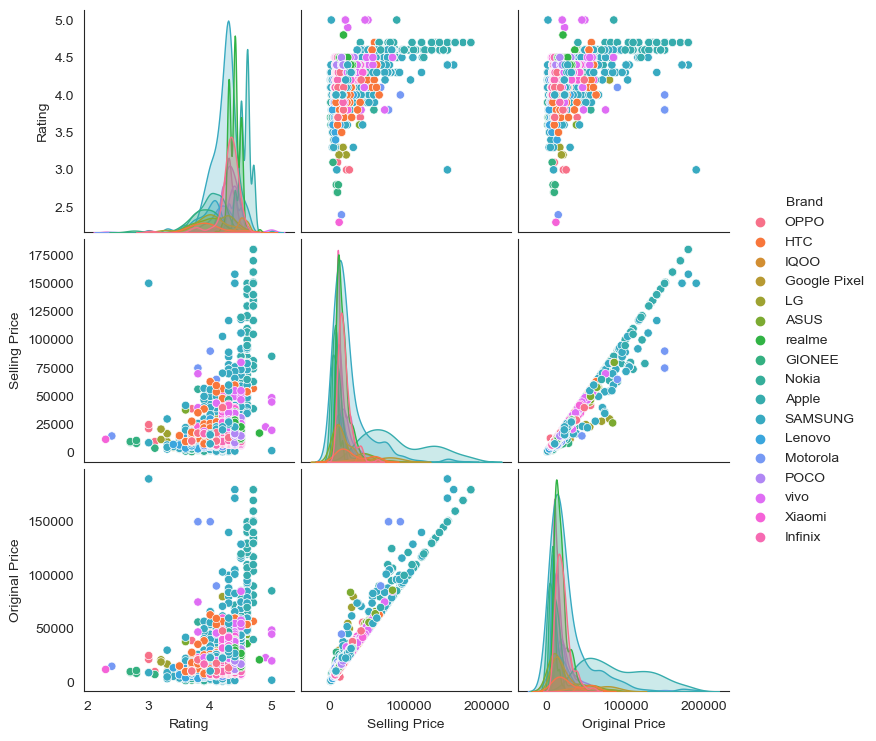

In [31]:
df1['Brand'].groupby(df1['Brand']).count().sort_values(ascending=False)
df1['Brand'].groupby(df1['Memory']).count().sort_values(ascending=False)
sns.set_style("white")
sns.pairplot(df1, hue='Brand')


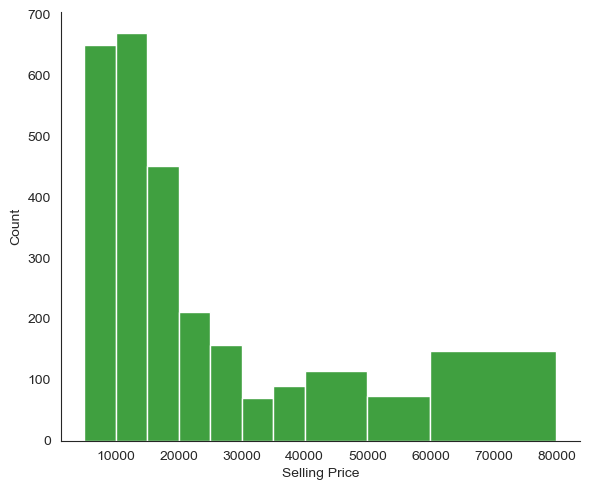

In [32]:
sns.displot(df1, x='Selling Price', bins=[5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 50000, 60000, 80000], aspect=1.2,color='green')

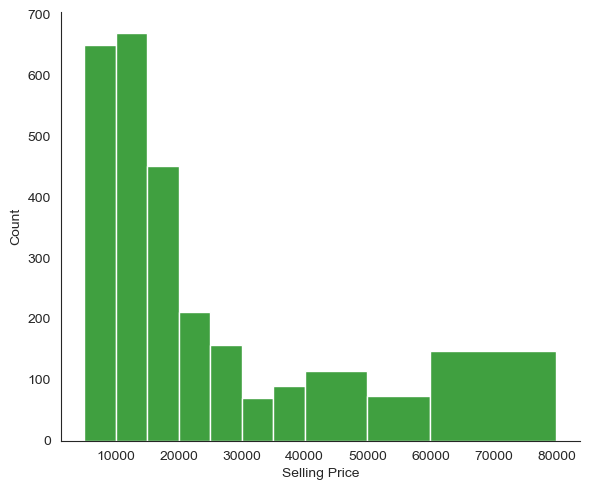

In [33]:
sns.displot(df1, x='Selling Price', bins=[5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 50000, 60000, 80000], aspect=1.2,color='green')

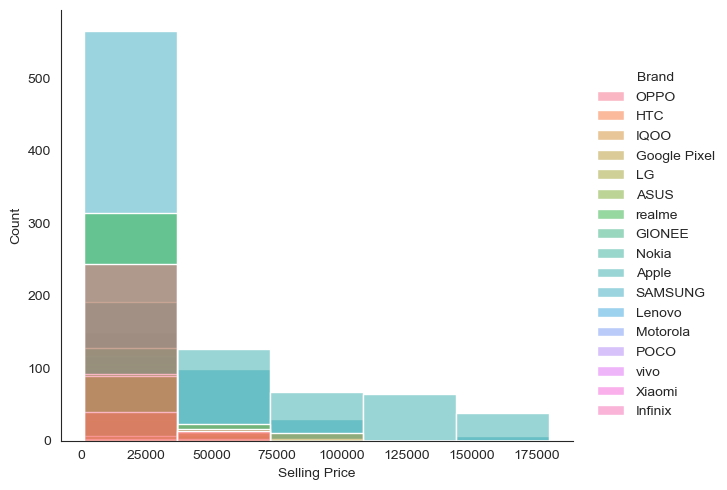

In [34]:
#brandwise mobile phone price segments
sns.displot(df1, x='Selling Price', bins=5, hue='Brand', aspect=1.2)

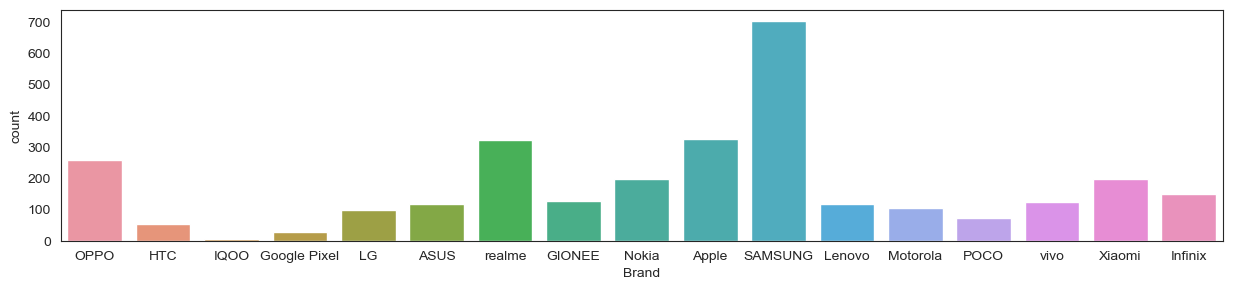

In [35]:
fig, ax =plt.subplots(figsize=(15,3))
ax=sns.countplot(x="Brand", data=df1)
                    

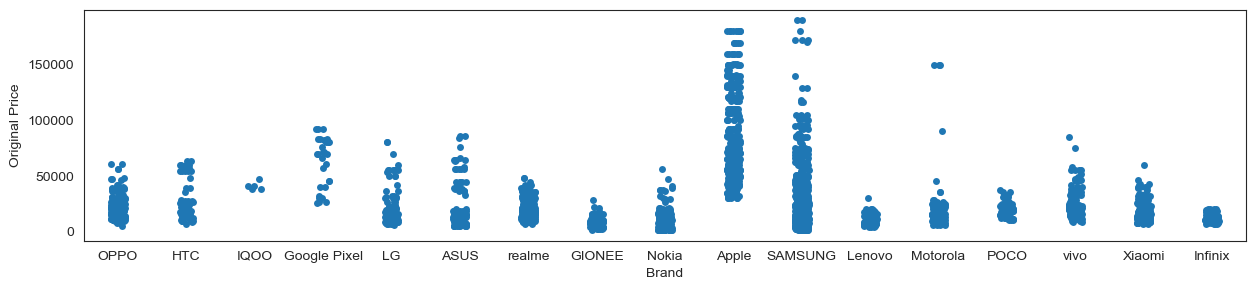

In [36]:
fig, ax =plt.subplots(figsize=(15,3))
ax=sns.stripplot(y="Original Price", x="Brand", data=df1)

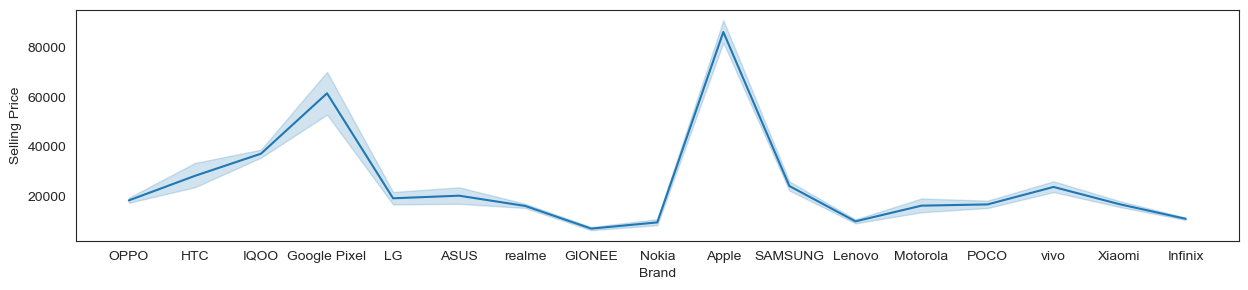

In [37]:
fig, ax =plt.subplots(figsize=(15,3))
ax=sns.lineplot(x="Brand", y="Selling Price", data=df1)

In [38]:
# Brandwise Mean selling prices
round(df1.groupby('Brand')['Selling Price'].mean(),0).sort_values(ascending=False)

Brand
Apple           85963.0
Google Pixel    61392.0
IQOO            37190.0
HTC             28314.0
SAMSUNG         24248.0
vivo            23866.0
ASUS            20367.0
LG              19323.0
OPPO            18493.0
Xiaomi          16942.0
POCO            16871.0
Motorola        16371.0
realme          16261.0
Infinix         11099.0
Lenovo          10087.0
Nokia            9663.0
GIONEE           7174.0
Name: Selling Price, dtype: float64

## Random Forest Classifier

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
df = pd.read_csv(r"C:\Users\sv833\Documents\FlipKart Mobile sales Data Visualisation and Price Prediction\Flipkart_Mobiles.csv")

In [41]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [42]:
df["Brand"]=df["Brand"].astype('category')
df["Brand"]=df["Brand"].cat.codes
df["Model"]=df["Model"].astype('category')
df["Model"]=df["Model"].cat.codes
df["Color"]=df["Color"].astype('category')
df["Color"]=df["Color"].cat.codes
df["Memory"]=df["Memory"].astype('category')
df["Memory"]=df["Memory"].cat.codes
df["Storage"]=df["Storage"].astype('category')
df["Storage"]=df["Storage"].cat.codes

In [43]:
print(df)

      Brand  Model  Color  Memory  Storage  Rating  Selling Price  \
0        11    125    359      14       19     4.5          11990   
1        11    125    347      14       19     4.5          11990   
2        11    125    359      19        3     4.3          13990   
3        11    125    347      19        3     4.3          13990   
4        11    125    188      14       19     4.5          11990   
...     ...    ...    ...     ...      ...     ...            ...   
3109     13    506     62      19        3     4.3          25990   
3110     13    506    270      19        3     4.3          25489   
3111     13    506    270      22        3     4.3          27239   
3112     13    506    512      22        3     4.2          22989   
3113     13    506    509      22        3     4.2          20350   

      Original Price  
0              15990  
1              15990  
2              17990  
3              17990  
4              15990  
...              ...  
3109      

In [44]:
x = df[['Model', 'Color', 'Memory', 'Storage', 'Rating','Original Price', 'Selling Price']]
y = df['Brand']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [46]:
# create a random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state=42)

# Train the model
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Make predictions on the test set
y_pred =  rf_classifier.predict(x_test)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix: \n{confusion}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.93
Confusion Matrix: 
[[ 29   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  49   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  17   0   0   0   0   1   0   1   0   0   0   1   0   0   0]
 [  0   0   0   5   0   0   0   0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   7   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  33   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   1   0   0   0  16   0   0   0   0   0   1   0   0   1]
 [  0   0   0   0   0   0   0   3  16   0   0   0   0   1   0   0   0]
 [  0   0   2   0   1   0   0   0   0  19   1   0   0   0   0   1   1]
 [  0   0   0   0   0   0   0   0   0   0  32   0   0   0   0   1   0]
 [  0   0   1   0   0   0   0   2   1   0   0  42   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0  12   3   0   0   0]
 [  0   0   2   0   0   0   0   0   0   0  

# Naive Bayes Classifier

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
df = pd.read_csv(r"C:\Users\sv833\Documents\FlipKart Mobile sales Data Visualisation and Price Prediction\Flipkart_Mobiles.csv")
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df["Brand"]=df["Brand"].astype('category')
df["Brand"]=df["Brand"].cat.codes
df["Model"]=df["Model"].astype('category')
df["Model"]=df["Model"].cat.codes
df["Color"]=df["Color"].astype('category')
df["Color"]=df["Color"].cat.codes
df["Memory"]=df["Memory"].astype('category')
df["Memory"]=df["Memory"].cat.codes
df["Storage"]=df["Storage"].astype('category')
df["Storage"]=df["Storage"].cat.codes

In [50]:
print(df)

      Brand  Model  Color  Memory  Storage  Rating  Selling Price  \
0        11    125    359      14       19     4.5          11990   
1        11    125    347      14       19     4.5          11990   
2        11    125    359      19        3     4.3          13990   
3        11    125    347      19        3     4.3          13990   
4        11    125    188      14       19     4.5          11990   
...     ...    ...    ...     ...      ...     ...            ...   
3109     13    506     62      19        3     4.3          25990   
3110     13    506    270      19        3     4.3          25489   
3111     13    506    270      22        3     4.3          27239   
3112     13    506    512      22        3     4.2          22989   
3113     13    506    509      22        3     4.2          20350   

      Original Price  
0              15990  
1              15990  
2              17990  
3              17990  
4              15990  
...              ...  
3109      

In [51]:
x = df[['Model', 'Color', 'Memory', 'Storage', 'Rating','Original Price', 'Selling Price']]
y = df['Brand']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [53]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [54]:
y_pred = nb_classifier.predict(x_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix: \n{confusion}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.38
Confusion Matrix: 
[[ 2  0 12  0  4  0  2  0  4  0  0  1  0  1  2  0  1]
 [ 0 49  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  6  0  2  0  3  0  0  0  1  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  1  3  0  1  1  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0 24  0  0  0  0  0  1  0  2  1  0]
 [ 0  0  3  1  0  0  9  1  0  0  0  0  0  3  1  0  2]
 [ 0  0  5  0  0  0  6  0  4  0  2  0  0  0  3  0  0]
 [ 0  0  5  1  0  0  0  0  5  0  1  5  1  2  0  1  4]
 [ 0  0  1  0  1  0  0  0  4  0 21  5  0  0  0  1  0]
 [ 0  0  1  0  1  0  0  3  1  0 12 16  1  1  3  7  1]
 [ 0  0  0  0  0  0  3  0  0  0  3  1  5  0  2  1  1]
 [ 0  0 28  0  0  0 15  0 13  0  2 20  4 42  0 16  0]
 [ 0  0  2  0  0  0 17  0  0  0  1  3  2  2  8  2  1]
 [ 0  0  1  0  0  0  8  0  3  0 12  9  1  0  1  6  9]
 [ 0  0  1  0  0  0  2  0  1  0  0  0  1  0  4  0 19]]
Classification Report:
              precision 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [57]:
df = pd.read_csv(r"C:\Users\sv833\Documents\FlipKart Mobile sales Data Visualisation and Price Prediction\Flipkart_Mobiles.csv")
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df["Brand"]=df["Brand"].astype('category')
df["Brand"]=df["Brand"].cat.codes
df["Model"]=df["Model"].astype('category')
df["Model"]=df["Model"].cat.codes
df["Color"]=df["Color"].astype('category')
df["Color"]=df["Color"].cat.codes
df["Memory"]=df["Memory"].astype('category')
df["Memory"]=df["Memory"].cat.codes
df["Storage"]=df["Storage"].astype('category')
df["Storage"]=df["Storage"].cat.codes

print(df)

      Brand  Model  Color  Memory  Storage  Rating  Selling Price  \
0        11    125    359      14       19     4.5          11990   
1        11    125    347      14       19     4.5          11990   
2        11    125    359      19        3     4.3          13990   
3        11    125    347      19        3     4.3          13990   
4        11    125    188      14       19     4.5          11990   
...     ...    ...    ...     ...      ...     ...            ...   
3109     13    506     62      19        3     4.3          25990   
3110     13    506    270      19        3     4.3          25489   
3111     13    506    270      22        3     4.3          27239   
3112     13    506    512      22        3     4.2          22989   
3113     13    506    509      22        3     4.2          20350   

      Original Price  
0              15990  
1              15990  
2              17990  
3              17990  
4              15990  
...              ...  
3109      

In [58]:
x = df[['Model', 'Color', 'Memory', 'Storage', 'Rating','Original Price', 'Selling Price']]
y = df['Brand']

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [60]:
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [61]:
y_pred = logistic_classifier.predict(x_test)

In [62]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix: \n{confusion}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.22
Confusion Matrix: 
[[ 0  4  0  0  0  0  6  0  0  1  0  0  0 14  4  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0]
 [ 0  1  0  0  0  0  1  0  0  1  0  0  0 16  1  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 33  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  1  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  1  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0 24  0  0  0]
 [ 0  6  0  0  0  0  1  0  0  0  0  0  0 24  0  2  0]
 [ 0 11  0  0  0  0  0  0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0]
 [ 0 33  0  0  0  0  4  0  0  0  0  0  0 99  4  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0 37  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0 49  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0 26  0  0  0]]
Classification Report:
              precision 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Model Performance Summary:**

- **Naive Bayes:** Moderate performance with 38% accuracy.
- **Logistic Regression:** Poor performance with 22% accuracy.
- **Random Forest:** Excellent performance with 93% accuracy.

**Conclusion:** Random Forest outperforms both Naive Bayes and Logistic Regression, making it the best choice for predicting mobile phone brands.
